In [1]:
from methods.config import *
import numpy as np; rnd=np.random.default_rng()
import matplotlib.pyplot as plt; import matplotlib as mpl
import scipy.stats

import pickle
import methods.util as util
import methods.shared as shared
import methods.sim_barcodes as sim

plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['svg.fonttype'] = 'none'

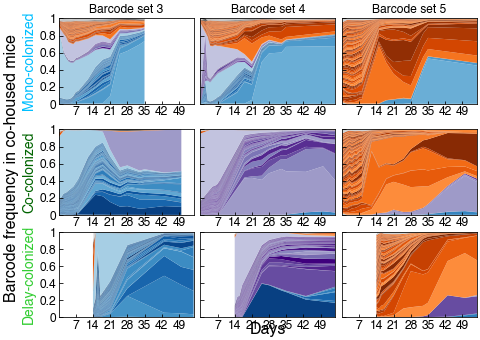

In [5]:
expt = 'E2'
fig = plt.figure(figsize=(7.5, 5.5))
gs = plt.GridSpec(nrows=5, ncols=3, figure=fig, height_ratios=(1, 0.3, 1, 0.2, 1), hspace=0.0, wspace=0.05)
outer_ax = fig.add_subplot(gs[:, :])
outer_ax.set_xlabel('Days', fontsize=16)
outer_ax.set_ylabel('Barcode frequency in co-housed mice', fontsize=16, labelpad=40)
util.turn_off_ax(outer_ax)

MAX_CUTOFF = 1e-3
FINAL_CUTOFF = 1
for row, (m_set, condition_color, label) in enumerate(zip([[8, 9, 10], [3, 4, 5], [13, 14, 15]],
                                                   ['deepskyblue', 'darkgreen', 'limegreen'], ['Mono-colonized', 'Co-colonized', 'Delay-colonized'])):
    large_indices = shared.find_large_barcodes(expt, m_set, max_cutoff=MAX_CUTOFF, final_cutoff=FINAL_CUTOFF)
    ordered_indices, ordered_colors = shared.order_barcodes_by_pool(large_indices, shared.barcode_pool_assignments, [('set3_plotting', 'Blues'), 
                                                                                                         ('set4_plotting', 'Purples'), 
                                                                                                         ('set5', 'Oranges'),
                                                                                                         ('E2_ambiguous_plotting', 'Greys')], cg_at_end=False)
    for col, mouse in enumerate(m_set):
        days, freqs = shared.make_muller_freqs(expt, mouse, ordered_indices, 18)

        if mouse > 10:
            freqs = freqs[days >= 14]
            days = days[days >= 14]

        ax = fig.add_subplot(gs[row*2, col])
        shared.muller_plot(ax, days, ordered_indices, freqs, ordered_colors)

        # ax.set_xticks(days)
        ax.set_xlim(0, 55)
        ax.set_xticks([7, 14, 21, 28, 35, 42, 49])
        ax.set_xticklabels([7, 14, 21, 28, 35, 42, 49], fontsize=12)

        ax.set_ylim(0, 1)
        ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=12)

        if row == 0:
            ax.set_title(f'Barcode set {col+3}', fontsize=12)
        if col > 0:
            ax.set_yticklabels([])
        if col == 0:
            ax.set_ylabel(label, fontsize=14, color=condition_color, ha='center')

fig.savefig(f'../figures/fig6_comm_cohoused_muller.svg', transparent=True, bbox_inches='tight')

In [6]:
expt = 'E2'
max_dt = 3
max_day = 60

cohoused_mice_dict = {8: [9, 10], 9: [8, 10], 10: [8, 9], 
                      3: [4, 5], 4: [3, 5], 5: [3, 4], 
                      13: [14, 15], 14: [13, 15], 15: [13, 14]}
S3_bool = shared.barcode_pool_assignments['set3'][1]
S4_bool = shared.barcode_pool_assignments['set4'][1]
S5_bool = shared.barcode_pool_assignments['set5'][1]
# cohoused_mice_bool = {8:S4_bool+S5_bool, 9:S3_bool+S5_bool, 10:S3_bool+S4_bool, 
#                      3:S4_bool+S5_bool, 4:S3_bool+S5_bool, 5:S3_bool+S4_bool, 
#                      13:S4_bool+S5_bool, 14:S3_bool+S5_bool, 15:S3_bool+S4_bool}
cohoused_mice_bool = {8:S3_bool, 9:S4_bool, 10:S5_bool, 3:S3_bool, 4:S4_bool, 5:S5_bool, 13:S3_bool, 14:S4_bool, 15:S5_bool}


E2_transmission_dict = {m:{donor:{} for donor in donors} for m, donors in cohoused_mice_dict.items()}

rescale_migration = 3
max_groups = 2
min_barcodes = 30
for recipient_mouse, donor_mice in cohoused_mice_dict.items():
    for donor_mouse in donor_mice:
        time_pts = shared.find_consecutive_timepoints(expt, [donor_mouse], recipient_mouse, max_dt=max_dt, max_day=max_day)
        for i, time_pt in enumerate(time_pts):
            t0, t1 = time_pt
            output_dict = shared.measure_transmission_in_interval(expt, recipient_mouse, [donor_mouse], t0, t1, 
                                                                pool_assignment_bool=cohoused_mice_bool[donor_mouse], coarse_grain_num_groups=2, 
                                                                min_barcodes=min_barcodes, rescale_migration=rescale_migration)
            E2_transmission_dict[recipient_mouse][donor_mouse][(t0, t1)] = output_dict

# also load transmisison measures from E1 (Fig. 2), for comparisons
with open(f'{data_dir}/pickled/E1_transmission_dict.pkl', 'rb') as f:
    E1_transmission_dict = pickle.load(f)


Not enough barcodes for 8 at 33 to 35
Not enough barcodes for 8 at 15 to 18
Not enough barcodes for 8 at 18 to 21
Not enough barcodes for 8 at 25 to 28
Not enough barcodes for 8 at 33 to 35
Not enough barcodes for 9 at 15 to 18
Not enough barcodes for 9 at 18 to 21
Not enough barcodes for 9 at 25 to 28
Not enough barcodes for 9 at 33 to 35
no detected barcodes, m= 0.00017892820444572076
no detected barcodes, m= 0.0012178869591077054
no detected barcodes, m= 0.0011259574496561907
no detected barcodes, m= 0.0015027069581139596
no detected barcodes, m= 0.0009054090882213651
no detected barcodes, m= 5.085358672425073e-05
no detected barcodes, m= 0.0008392611655907088
Not enough barcodes for 14 at 14 to 17
Not enough barcodes for 14 at 14 to 16
Not enough barcodes for 14 at 14 to 15
Not enough barcodes for 15 at 14 to 17
Not enough barcodes for 15 at 14 to 16
Not enough barcodes for 15 at 14 to 15
no detected barcodes, m= 0.0005040067686598203


/opt/anaconda3/envs/kim_barcodes/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1105: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/anaconda3/envs/kim_barcodes/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1106: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/opt/anaconda3/envs/kim_barcodes/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/anaconda3/envs/kim_barcodes/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


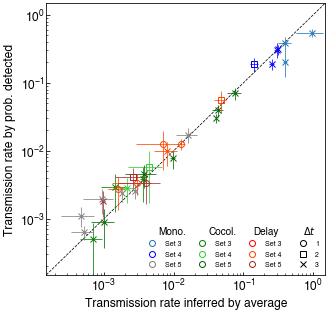

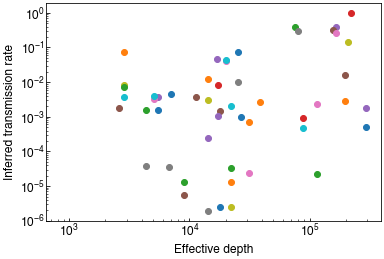

In [8]:
si_fig, si_ax = plt.subplots(figsize=(5, 5))
mouse_colors = {8:'tab:blue', 9:'blue', 10:'grey', 3:'green', 4:'limegreen', 5:'darkgreen', 13:'red', 14:'orangered', 15:'brown'}
x, y = [], []
E2_transmission_avg = {m:[] for m in mouse_colors.keys()}
fig, depth_ax = plt.subplots()
for r, recipient_m in enumerate([3,4,5,13,14,15,8,9,10]):
    for donor in E2_transmission_dict[recipient_m].keys():
        transmission_measurements = E2_transmission_dict[recipient_m][donor]
        color = mouse_colors[recipient_m]


        for (t0, t1), measurements in transmission_measurements.items():
            if measurements is None:
                continue
            if t1-t0 > 3: continue
            elif t1-t0 == 2 and (t0+1, t1) in transmission_measurements: continue
            elif t1-t0 == 3 and np.any([(t0 + x, t1) in transmission_measurements for x in range(1,3)]): continue
            
            # sampled_days.add(t1)
            if t1-t0 == 1: fmt = 'o'
            elif t1-t0 == 2: fmt = 's'
            elif t1-t0 == 3: fmt = 'x'
        
            
            donor_floor, recip_floor_t0, recip_floor_t1 = measurements['freq floors']
            m_detect, m_detect_err  = measurements['detected inference']
            (donor_valid, recip_valid, donor_cg, recip_cg) = measurements['ratio raw data'] 
            bins, density = measurements['detected raw data']
            m_ratio, m_ratio_err = measurements['ratio inference']
            depth_ax.scatter( recip_floor_t1**-1., m_ratio )
            x.append(recip_floor_t1**-1.)
            y.append(m_detect)

            E2_transmission_avg[recipient_m].append(m_detect)

            if np.sum(recip_cg) < recip_floor_t1:
                continue

            dt =1
            si_ax.errorbar(m_ratio/dt, m_detect/dt, xerr=m_ratio_err/dt, yerr=m_detect_err/dt, color=mouse_colors[recipient_m], mfc='none', fmt=fmt)


legend_markers = [mpl.lines.Line2D([0], [0], marker='o', color=mouse_colors[mouse], markerfacecolor='none', lw=0) for mouse in [8,9,10, 3,4,5,13,14,15]] + \
                [mpl.lines.Line2D([0], [0], marker='o', mfc='none', color='black',lw=0, ),
                  mpl.lines.Line2D([0], [0], marker='s', mfc='none', color='black',lw=0 ),
                  mpl.lines.Line2D([0], [0], marker='x', mfc='none', color='black',lw=0 )]
si_ax.legend(legend_markers, ['Set 3', 'Set 4', 'Set 5', 'Set 3', 'Set 4', 'Set 5', 'Set 3', 'Set 4', 'Set 5', '1', '2', '3'], loc=4, ncol=4, fontsize=7, frameon=False)
si_ax.text(0.4, 0.15, 'Mono.', transform=si_ax.transAxes, ha='left', color='black')
si_ax.text(0.58, 0.15, 'Cocol.', transform=si_ax.transAxes, ha='left', color='black')
si_ax.text(0.74, 0.15, 'Delay', transform=si_ax.transAxes, ha='left', color='black')
si_ax.text(0.92, 0.15, '$\Delta t$', transform=si_ax.transAxes, ha='left', color='black')

util.plot_diagonal(si_ax)
si_ax.set_xscale('log')
si_ax.set_yscale('log')
si_ax.set_xlabel('Transmission rate inferred by average', fontsize=12)
si_ax.set_ylabel('Transmission rate by prob. detected', fontsize=12)
si_ax.tick_params(axis='y', labelsize=12)
si_ax.tick_params(axis='x', labelsize=12)
si_ax.set_xlim(1.5*10**-4, 1.5)
si_ax.set_ylim(1.5*10**-4, 1.5)

depth_ax.set_xscale('log')
depth_ax.set_yscale('log')
depth_ax.set_xlabel('Effective depth', fontsize=12)
depth_ax.set_ylabel('Inferred transmission rate', fontsize=12)

si_fig.savefig(f'../figures/sfig_comm_transmission.svg', format='svg', transparent=True, bbox_inches='tight')


In [9]:
mono_m, mono_m_err, mono_m_labels = [], [], []
for mouse, transmission_dict in E1_transmission_dict.items():
    for (t0, t1), measurements in transmission_dict.items():
        if t1<=14 or measurements is None:
                continue
        if t1-t0 > 3: continue
        elif t1-t0 == 2 and (t0+1, t1) in transmission_measurements: continue
        elif t1-t0 == 3 and np.any([(t0 + x, t1) in transmission_measurements for x in range(1,3)]): continue
        
        donor_floor, recip_floor_t0, recip_floor_t1 = measurements['freq floors']
        valid_donor, valid_recip, donor_cg, recip_cg = measurements['ratio raw data']
        transmission, transmission_err = measurements['detected inference']
        if np.isnan(transmission): # too few barcodes 
            continue
        dt = 1 #resclaing option

        x = 0 + rnd.uniform(-0.4, 0.4)

        mono_m.append(transmission/dt)
        mono_m_err.append(transmission_err/dt)

        if mouse in [4,5]:
            mono_m_labels.append('P2 col.')
        elif mouse in [6,7]:
            mono_m_labels.append('P1 col.')


comm_m, comm_m_err, comm_m_labels = [], [], []
E2_transmissions = {3:[], 4:[], 5:[], 13:[], 14:[], 15:[], 8:[], 9:[], 10:[]}
for r, recipient_m in enumerate(E2_transmission_dict.keys()):
    for donor in E2_transmission_dict[recipient_m].keys():
        transmission_measurements = E2_transmission_dict[recipient_m][donor]

        for (t0, t1), measurements in transmission_measurements.items():
            if t1 <= 14 or measurements is None:
                continue
            if t1-t0 > 3: continue
            elif t1-t0 == 2 and (t0+1, t1) in transmission_measurements: continue
            elif t1-t0 == 3 and np.any([(t0 + x, t1) in transmission_measurements for x in range(1,3)]): continue
            
            donor_floor, recip_floor_t0, recip_floor_t1 = measurements['freq floors']
            valid_donor, valid_recip, donor_cg, recip_cg = measurements['ratio raw data']
            transmission, transmission_err = measurements['detected inference']
            if np.isnan(transmission):
                continue
            dt = 1

            x = 0 + rnd.uniform(-0.4, 0.4)
            if recipient_m in [8, 9, 10]:
                mono_m.append(transmission/dt)
                mono_m_err.append(transmission_err/dt)
                if recipient_m == 10:
                    mono_m_labels.append('Set 5 col.')
                else:
                    mono_m_labels.append('Set 3,4 col.')
                
            elif recipient_m in [3,4,5]:
                x += 1
                comm_m.append(transmission/dt)
                comm_m_err.append(transmission_err/dt)
                comm_m_labels.append('Co-colonized')

            elif recipient_m in [13,14,15]:
                x += 1
                comm_m.append(transmission/dt)
                comm_m_err.append(transmission_err/dt)
                comm_m_labels.append('Delay-colonized')

log_mono_m = np.log10(mono_m)
log_mono_m_err = np.log10(mono_m_err)
log_comm_m = np.log10(comm_m)
log_comm_m_err = np.log10(comm_m_err)
print(len(log_mono_m[~np.isnan(log_mono_m)]), len(log_comm_m[~np.isnan(log_comm_m)]))
delta_log_transmission = np.mean(log_mono_m[~np.isnan(log_mono_m)]) - np.mean(log_comm_m[~np.isnan(log_comm_m)])
print(delta_log_transmission)
print(scipy.stats.ttest_ind(log_mono_m[~np.isnan(log_mono_m)], log_comm_m[~np.isnan(log_comm_m)], equal_var=False, alternative='greater'))


63 34
0.6491146394928322
Ttest_indResult(statistic=4.959671822420616, pvalue=1.800595349909967e-06)


/var/folders/x3/8f6xdlhn4hscmskkzs52dycc0000gn/T/ipykernel_21619/4095851414.py:72: RuntimeWarning: divide by zero encountered in log10
  log_comm_m_err = np.log10(comm_m_err)


/var/folders/x3/8f6xdlhn4hscmskkzs52dycc0000gn/T/ipykernel_21619/3288814705.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Monocolonized\n'+r'$\tau_{m}$', 'Community colonized\n'+r'$\tau_{c}$'], fontsize=10)


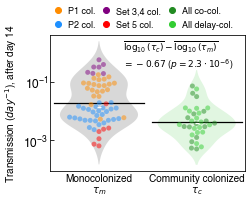

In [10]:
import pandas as pd
import seaborn as sns 
all_labels = ['Monocolonized']*len(mono_m) + ['Community colonized']*len(comm_m) 
all_transmissions = mono_m + comm_m
all_errs = mono_m_err + comm_m_err
all_sublabels = mono_m_labels + comm_m_labels
df = pd.DataFrame({'Transmission rate':all_transmissions, 'Condition':all_labels, 'Error':all_errs, 'Subcondition':all_sublabels})

color_scheme = {'P1 col.': 'darkorange', 'P2 col.': 'dodgerblue', 'Set 3,4 col.': 'purple', 'Set 5 col.':'red', 'Co-colonized': 'forestgreen', 'Delay-colonized': 'limegreen'}

comm_typical_migration = np.exp(np.mean(np.log(comm_m)))

# ax = sns.swarmplot(mono_m, log_scale=True, color='blue')
summary_fig, ax = plt.subplots(figsize=(3.5, 2.5))
# sns.violinplot(data=df, x="Condition", y='Transmission rate', hue='Condition', split=True, gap=-0.2, log_scale=True, ax=ax, alpha=0.5, edgecolor='none')
sns.violinplot(data=df, x="Condition", y='Transmission rate', hue='Condition',log_scale=True, palette={'Monocolonized': 'grey', 'Community colonized': 'lightgreen'}, ax=ax, alpha=0.3, edgecolor='none', zorder=0)
sns.swarmplot(data=df, x="Condition", y='Transmission rate', hue='Subcondition', palette=color_scheme,  log_scale=True, ax=ax, alpha=0.5, legend=False, zorder=1)

ax.set_xticklabels(['Monocolonized\n'+r'$\tau_{m}$', 'Community colonized\n'+r'$\tau_{c}$'], fontsize=10)
ax.set_xlabel('')
ax.set_ylabel(r'Transmission ($day^{-1}$), after day 14', fontsize=10)
ax.tick_params(axis='x', width=0)


ax.text(0.25, 3, r'$\overline{\log_{10}(\tau_{c})}-\overline{\log_{10}(\tau_{m})}$' +'\n$=-0.67$ ($p=2.3 \cdot 10^{-6}$)', color='k', ha='left', va='top', fontsize=9)

ax.axhline(10**np.nanmean(np.log10(mono_m)), xmin=0.02, xmax=0.48, lw=1.25, color='black', zorder=0)
ax.axhline(10**np.nanmean(np.log10(comm_m)), xmin=0.52, xmax=0.98, lw=1.25, color='black', zorder=0)
legend_markers = [mpl.lines.Line2D([0], [0], marker='o', color=color, lw=0) for color in ['darkorange', 'dodgerblue', 'purple', 'red', 'forestgreen', 'limegreen']]
legend_labels = ['P1 col.', 'P2 col.', 'Set 3,4 col.', 'Set 5 col.', 'All co-col.', 'All delay-col.']
ax.legend(legend_markers, legend_labels, frameon=False, ncol=3, bbox_transform=ax.transAxes, fontsize=9, handletextpad=0.1, columnspacing=0.2, loc=(-0.025, 1.02))

summary_fig.savefig(f'../figures/summary_of_transmission.pdf', transparent=True, bbox_inches='tight')

/var/folders/x3/8f6xdlhn4hscmskkzs52dycc0000gn/T/ipykernel_21619/3151940078.py:75: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_to_fit = np.array([[day, ratio, ratio_err] for day, ratio, ratio_err in zip(SHARED_DAYS, y, yerr)])


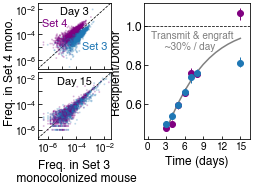

In [11]:
donor_m_colors = {8:'tab:blue', 9:'purple'}
d0_freqs = {8: shared.freq_array[4],
            9: shared.freq_array[5],
            10: shared.freq_array[6]}
DAY0_MIN = 10**-4
SHARED_DAYS = np.array( [day for day in range(3,16) if ('E2', 8, day) in shared.vivo_row_ids \
               and ('E2', 9, day) in shared.vivo_row_ids] )
day_freq_map = {day:([], [], [], []) for day in SHARED_DAYS}

fig = plt.figure(figsize=(3.8, 2.5))
gs = plt.GridSpec(nrows=1, ncols=3, width_ratios=(0.7,0.25,1), wspace=0.05, figure=fig)
outer_scatter = fig.add_subplot(gs[:1])
util.turn_off_ax(outer_scatter)
outer_scatter.set_xlabel('Freq. in Set 3\n monocolonized mouse', fontsize=12, labelpad=20)
outer_scatter.set_ylabel('Freq. in Set 4 mono.', fontsize=12, labelpad=22)

summary_ax = fig.add_subplot(gs[-1])
fitting_data = [[], [], []] #x, y, yerr
for i, (recip_m, donor_m, other_m, donor_bool) in enumerate([(8,9,10, shared.barcode_pool_assignments['set4'][1] ), (9,8,10, shared.barcode_pool_assignments['set3'][1])]):
    init_day = SHARED_DAYS[0]
    recip_init, donor_init = shared.freq_array[[shared.vivo_row_ids[('E2', m, init_day)] for m in [recip_m, donor_m]]]
    init_avg = (recip_init + donor_init) / 2

    donor_init_large = (donor_init > DAY0_MIN)
    valid = donor_bool
    ratios = recip_init[valid & donor_init_large] / init_avg[valid & donor_init_large]
    sorting = ratios.argsort()

    sorted_indices = np.arange(valid.shape[0])[valid][sorting]
    y, yerr = [], []
    y_cg = []

    subset = sorted_indices
    y, yerr = [], []
    
    low_diversity_bool = shared.barcode_pool_assignments['set5'][1]

    for d, day in enumerate(SHARED_DAYS):
        recip_freqs, donor_freqs = np.copy(shared.freq_array[[shared.vivo_row_ids[('E2', m, day)] for m in [recip_m, donor_m]]][:, subset])
        recip_low_diversity = shared.freq_array[shared.vivo_row_ids[('E2', recip_m, day)]][low_diversity_bool].sum()
        donor_low_diversity = shared.freq_array[shared.vivo_row_ids[('E2', donor_m, day)]][low_diversity_bool].sum()

        recip_De, donor_De = shared.Deff_array[[shared.vivo_row_ids[('E2', m, day)] for m in [recip_m, donor_m]]]
        mavg_freqs = donor_freqs
        finite_avg = (recip_freqs > 1/recip_De) * (donor_freqs > 1/donor_De)
        ratios = (recip_freqs[finite_avg] / mavg_freqs[finite_avg])
        
        
        bootstrap_ratios = []
        for _ in range(1000):
            bootstrap_sample = rnd.choice(np.arange(ratios.shape[0]), ratios.shape[0], replace=True)
            bootstrap_ratios.append( np.median(ratios[bootstrap_sample]) )
        median, iqr = np.median(ratios), np.percentile(bootstrap_ratios, (5, 95))

        if donor_m == 8:
            day_freq_map[day][0].extend(donor_freqs)
            day_freq_map[day][1].extend(recip_freqs)
            day_freq_map[day][2].extend( [donor_m_colors[donor_m]]*len(donor_freqs) )
            day_freq_map[day][3].append(shared.freq_array[shared.vivo_row_ids[('E2', recip_m, day)]][low_diversity_bool])

        elif donor_m == 9:
            day_freq_map[day][1].extend(donor_freqs)
            day_freq_map[day][0].extend(recip_freqs)
            day_freq_map[day][2].extend( [donor_m_colors[donor_m]]*len(donor_freqs) )
            day_freq_map[day][3].append(shared.freq_array[shared.vivo_row_ids[('E2', recip_m, day)]][low_diversity_bool])
            
        err = np.array([median - iqr[0], iqr[1] - median])
        y_cg.append(recip_freqs[finite_avg].sum() / donor_freqs[finite_avg].sum() )
        y.append(median) 
        yerr.append(err)


    summary_ax.errorbar(SHARED_DAYS, np.array(y), yerr=np.transpose(yerr), marker='.', markersize=12, lw=0, elinewidth=1, color=donor_m_colors[donor_m])
    
    data_to_fit = np.array([[day, ratio, ratio_err] for day, ratio, ratio_err in zip(SHARED_DAYS, y, yerr)])
    days_before_8, y, yerr = [list(arr) for arr in np.transpose(data_to_fit)]
    fitting_data[0].extend(days_before_8)
    fitting_data[1].extend(y)
    fitting_data[2].extend(yerr)

summary_ax.set_xlim(-0.1, 16)
summary_ax.set_xticks([0, 3, 6, 9, 12, 15])
summary_ax.set_xticklabels([0, 3, 6, 9, 12, 15], fontsize=10)
summary_ax.set_xlabel("Time (days)", fontsize=12)
summary_ax.set_ylabel("Recipient/Donor", fontsize=12)
summary_ax.set_ylim(0.42, 1.12)
summary_ax.set_xlim(-0.5, 16.5)
summary_ax.axhline(1, color='black', linestyle='dashed', zorder=0)

# theory 
if 'theory':
    days_before_8, y, y_err = fitting_data
    x = np.array([[3]*len(days_before_8), days_before_8])

    def theory_recip_donor_ratio(x, rescaled_migration, init_ratio):
        init_day, day = x
        
        rho_num = 1 - (1-init_ratio)/(1+init_ratio) * np.exp(-rescaled_migration*(day-init_day))
        rho_denom = 1 + (1-init_ratio)/(1+init_ratio) * np.exp(-rescaled_migration*(day-init_day))
        return rho_num / rho_denom
    popt, pcov = scipy.optimize.curve_fit(theory_recip_donor_ratio, x, y, p0=(0.5, 0.4))
    fitted_rescaled_tau, _ = popt[0], popt[1]
    fitted_tau = fitted_rescaled_tau / (2/3) #2/3 is to rescale inference to input transmission per day

    days = np.arange(3, 16)
    y_fit = theory_recip_donor_ratio([3, days], *popt)
    summary_ax.plot(days, y_fit, color='grey', lw=1.5)
    summary_ax.text(0.5, 0.98, f'Transmit & engraft\n     ~{int(fitted_tau*100)}% / day', color='grey', fontsize=10, ha='left', va='top')

## examples
example_day_gs = mpl.gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0], hspace=0.05)
for d, day in enumerate([3,15]):
    x, y, colors, [m8_set5_freqs, m9_set5_freqs] = [np.array(e) for e in day_freq_map[day]]
    perm = rnd.permutation(np.arange(len(x)))

    ax = fig.add_subplot(example_day_gs[d])
    # ax.scatter(m8_set5_freqs, m9_set5_freqs, s=1, alpha=0.2, color='orange', rasterized=True) # show set 5 barcodes
    ax.scatter(x[perm], y[perm], s=1, alpha=0.2, color=colors[perm], rasterized=True)
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(2*10**-7, 3*10**-2)
    ax.set_ylim(2*10**-7, 3*10**-2)
    ax.text(0.5, 0.95, f'Day {day}', transform=ax.transAxes, fontsize=11, ha='center', va='top')
    xticks = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2]
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    labels = np.array(ax.get_xticklabels())
    labels[1::2] = ''
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    
    if d == 0:
        legend_markers = [mpl.lines.Line2D([0], [0], marker='o', color='tab:blue', lw=0),
                          mpl.lines.Line2D([0], [0], marker='o', color='purple', lw=0)]
        ax.text(0.6, 0.3, "Set 3", color=donor_m_colors[8], transform=ax.transAxes, fontsize=11, ha='left')
        ax.text(0.4, 0.65, "Set 4", color=donor_m_colors[9], transform=ax.transAxes, fontsize=11, ha='right')
        # ax.legend(legend_markers, ['Set 3', 'Set 4'], loc=4, ncol=1, fontsize=9, frameon=False)
        ax.set_xticklabels([])
    
    util.plot_diagonal(ax)
    ax.tick_params(axis='both', labelsize=10)

fig.savefig(f'../figures/fig6_M89_transmission_ratio.pdf', transparent=True, bbox_inches='tight')



Recipient, Avg, Std, Measurements
3 3.6e-03 3.2e-03 [0.0005012475253697312, 0.0038067417292744774, 0.0029148858401228193, 0.0012400829808506908, 0.00966051044050497]
4 3.8e-03 1.2e-03 [0.0028808297419743384, 0.005837194103581274, 0.002827198283946257, 0.0036536608773231165]
5 3.1e-02 2.4e-02 [0.004513473000756686, 0.030678518051145652, 0.007868697320860516, 0.03973270826212014, 0.07033684518022029]
13 2.1e-03 1.4e-03 [0.0018797828303309682, 0.004508120874341879, 0.0005923107344288829, 0.0007624032583687085, 0.0025177834967721265]
14 1.6e-02 1.7e-02 [0.0034100686685006533, 0.012207147580033594, 0.002711769136944862, 0.012587407167343306, 0.012586140318052635, 0.009817301109568102, 0.05571810644499388]
15 4.1e-03 2.3e-03 [0.008375243441552818, 0.005654367263486925, 0.0015120203059794612, 0.0033464539813349544, 0.001827501570391171, 0.004173136398279979]


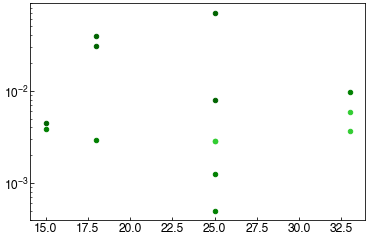

In [12]:
# relatively weak mouse-to-mouse variation in transmission, so take average

print('Recipient, Avg, Std, Measurements')

fig, ax = plt.subplots()
transmission_averages = {}
for recip_mouse in [3,4,5,13,14,15]:
    measures, errs = [], []
    days = []
    for donor_mouse, donor_specific_measurements in E2_transmission_dict[recip_mouse].items():
        donor_specific_measures, donor_specific_errs = [], []
        for (t0, t1), measurements in donor_specific_measurements.items():
            if t0 <= 3 or measurements is None:
                continue
            if t1-t0 > 3: continue
            elif t1-t0 == 2 and (t0+1, t1) in transmission_measurements: continue
            elif t1-t0 == 3 and np.any([(t0 + x, t1) in transmission_measurements for x in range(1,3)]): continue
        # print(donor_specific_measurements.values())
        # avg = np.nanmean([np.log(m['detected inference'][0]) for m in donor_specific_measurements.values() if m != None])
        # std = np.nanstd([np.log(m['detected inference'][0]) for m in donor_specific_measurements.values() if m != None])
            transmission, err = measurements['detected inference']
            if np.isnan(transmission):
                continue
            donor_specific_measures.append(transmission)
            donor_specific_errs.append(err)
            days.append(t0)
        errs.extend(donor_specific_errs)
        measures.extend(donor_specific_measures)

    if recip_mouse > 10:
        marker = 'x'
    else: 
        marker = 'o'
        ax.scatter(days, measures, color=mouse_colors[recip_mouse], s=20, marker=marker)
    print(recip_mouse, f'{np.mean(measures):.1e}', f'{np.std(measures):.1e}', measures)
    transmission_averages[recip_mouse] = np.mean(measures)

ax.set_yscale('log')
        # print(recip_mouse, donor_mouse, avg, std, [((t0, t1), m['detected inference'][0]) for ((t0,t1), m) in donor_specific_measurements.items() if m != None])



0.004277408523865059
0.009766524439191664


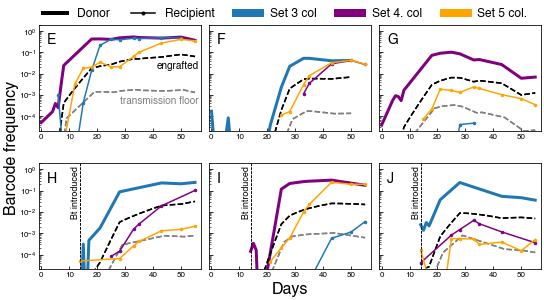

In [15]:
expt = 'E2'

example_barcodes = { # BARCODE: (DONOR, COLOR, ROW, COL)
    'ATTTGTTAGGGCAACAGTGC': ([4], 'navy', 0, 0, 'E'),
    'ATTTACTGGCGATAAACATA':([3], 'darkorange', 0, 1, 'F'),
    'AATCTGTAAACCCTCTATTG': ([4], 'navy', 0, 2, 'G'),
    'CGGCCGTGAGTGAATCCTGT': ([13], 'navy', 1, 0, 'H'),
    'TTTTGGCGTATAGTGACCAT': ([14], 'darkorange', 1, 1, 'I'),
    'ATACATAGGCAGCATCTCAC': ([13], 'darkorange', 1, 2, 'J'),
    # 'TGGGAGTAGGACTTGTCGAT': ([14], 'darkorange', 1, 2, 'J')
    }


donor_recipient_map = {3:[4,5], 4:[3,5], 5:[3,4], 13:[14,15], 14:[13,15], 15:[13,14]}
mouse_colors = {3:'tab:blue', 4:'purple', 5:'orange',
                13:'tab:blue', 14:'purple', 15:'orange'}

fig = plt.figure(figsize=(9,4.5))
gs = plt.GridSpec(2,3, figure=fig, wspace=0.05, hspace=0.3)
outer_upper = fig.add_subplot(gs[:, :])
outer_lower = fig.add_subplot(gs[-1, :])
util.turn_off_ax(outer_upper)
util.turn_off_ax(outer_lower)
outer_lower.set_xlabel('Days', fontsize=16, labelpad=12)
outer_upper.set_ylabel('Barcode frequency', labelpad=20, fontsize=16)

transmission_averages = {m:np.mean(10**log_comm_m)for m in [3,4,5,13,14,15]}
# transmission_averages = {m:10**np.mean(log_comm_m)for m in [3,4,5,13,14,15]}
print(10**(np.mean(log_comm_m)))
print(np.mean(10**(log_comm_m)))


for barcode, (donors, color, row, col, panel) in example_barcodes.items():
    bc_index = np.where(shared.barcodes == barcode)[0][0]
    donor_mouse = donors[0]
    recipients = donor_recipient_map[donors[0]]
    freq_ax = fig.add_subplot(gs[row, col])

    donor_days, donor_rows, cec_row = shared.mouse_meta[expt][donor_mouse]
    donor_freqs = shared.freq_array[donor_rows][:, bc_index]

    init_day = np.min(donor_days[donor_freqs > 0.01])

    init_day = 0
    if donor_mouse > 10:
        init_day = 14

    recip_theory_colors = [(mouse_colors[m], mouse_colors[m]) for m in recipients]
    shared.plot_barcode_trajectories(freq_ax, barcode, 'E2', donors, recipients, transmission_averages, mouse_colors, init_day, plot_other_donors=False)

    freq_ax.set_yscale('log')
    freq_ax.set_yticks([10**-4, 10**-3, 10**-2, 10**-1, 1])
    freq_ax.set_ylim(2*10**-5, 2)
    freq_ax.set_xticks([0, 10, 20, 30, 40,50])
    freq_ax.set_xticklabels([0, 10, 20, 30, 40,50], fontsize=8)
    freq_ax.yaxis.set_tick_params(labelsize=8)

    freq_ax.text(0.05, 0.82, panel, transform=freq_ax.transAxes, fontsize=14, weight='heavy')
    if row == 0 and col == 0:
        freq_ax.text(0.99, 0.33, 'transmission floor', fontsize=10, color='grey',
                     ha='right', va='top', transform=freq_ax.transAxes)
        freq_ax.text(0.99, 0.66, 'engrafted', fontsize=10, color='black',
                     ha='right', va='top', transform=freq_ax.transAxes)


    if row == 1:
        freq_ax.axvline(14, color='black', linestyle='dashed')
    if col!=0:
        freq_ax.set_yticklabels([])
    freq_ax.set_xlim(-1, 57)


    condition_color = 'darkgreen'
    if donor_mouse > 10:
        condition_color = 'limegreen'
        freq_ax.axvline(14, color='black', linestyle='dashed', zorder=0)
        freq_ax.text(14, 1.5, 'Bt introduced', rotation=90, fontsize=9, va='top', ha='right')



legend_markers = [mpl.lines.Line2D((0,0), (0,0), lw=4, color='black'), mpl.lines.Line2D((0,0), (0,0), lw=1.5, marker='.', color='black')] +\
                   [mpl.lines.Line2D([0], [0], color=c, lw=8) for c in ['tab:blue', 'purple', 'orange']] 

outer_upper.legend(legend_markers, ['Donor', 'Recipient', 'Set 3 col', 'Set 4. col', 'Set 5 col.'], 
          ncol=5, columnspacing=1.8, labelspacing=0.25, fontsize=12, frameon=False, loc=(0, 1.0), bbox_transform=outer_upper.transAxes)

fig.savefig(f'../figures/comm_transmission_examples.pdf', transparent=True, bbox_inches='tight')